# Graphes : arbres de recherche binaire et quadtrees

Les graphes sont une notion très importante en informatique. Ils nous seront très utiles pour représenter des réseaux (de transport, de distribution d'énergie etc.) mais aussi pour construire des "espaces de recherche".

## Qu'est-ce qu'un graphe ?

L'histoire des graphes commence en 1735 dans la ville de Königsberg (qui est aujourd'hui l'enclave russe de Kaliningrad).

![Königsberg](img/konigsberg_1910.jpg)

Le mathématicien Leonhard Euler se pose la question de savoir s'il existe ou non une promenade dans les rues de Königsberg permettant, à partir d'un point de départ au choix, de passer une et une seule fois par chaque pont (il y en a 7), et de revenir à son point de départ.

La réponse est non mais la modélisation mathématique consiste à représenter le problème des sept ponts de Königsberg par un graphe :

![Problème des sept ponts de Königsberg](img/konigsberg.pdf)

Un graphe est constitué de *noeuds* (ici A, B, C, D et E) et *d'arêtes* (I, II, III, IV, V, VI et VII). Il est par exemple possible de passer du noeud A au noeud B puis de revenir à A. C'est ce qu'on appele un *cycle*.

Un *arbre* est un graphe sans cycle.

![Arbre](img/depth7.pdf)

Comment coder un graphe en python ? On peut utiliser un dictionnaire :

In [1]:
# dictionnaire konigsberg = {...}
    

On peut bien évidemment utiliser des classes d'objets.

## Noeud

In [2]:
%load_ext nb_mypy

Version 1.0.5


In [3]:
import typing

class Node:
    """Définition d'un noeud"""
    
    # Constructeur de noeud
    def __init__(self, label = "NaN", content = 0) -> None:
        self.label = label
        self.content = content
        
    # Méthode utilisée par print()
    def __str__(self) -> str:
        t = "Node(" + self.label + ", " + str(self.content) + ")"
        return t

In [4]:
a = Node(label = "A", content = 6)

In [5]:
type(a)

__main__.Node

In [6]:
print(a)

Node(A, 6)


## Arbre de recherche binaire

Commençons par modéliser un arbre de recherche binaire (sera aussi vu en cours d'algorithmique) :

![Arbre de recherche binaire](img/arbre_binaire.png)

In [7]:
class ArbreBin:
    """Arbre binaire"""
    
    # Constructeur d'arbre binaire
    def __init__(self, arbre_g, racine, arbre_d) -> None:
        self.arbre_g = arbre_g
        self.racine = racine
        self.arbre_d = arbre_d
    
    # A faire !
    def __str__(self) -> str:
        pass

<cell>11: error: Missing return statement  [empty-body]


In [8]:
af = ArbreBin(None, Node('F', 8), None)

In [9]:
ag = ArbreBin(None, Node('G', 11), None)

In [10]:
ad = ArbreBin(af, Node('D', 9), ag)

In [11]:
ae = ArbreBin(None, Node('E', 24), None)
ac = ArbreBin(ad, Node('C', 12), ae)
ab = ArbreBin(None, Node('B', 4), None)
aa = ArbreBin(ab, Node('A', 6), ac)

In [12]:
type(aa)

__main__.ArbreBin

In [13]:
# print(aa) doit donner : 
# ArbreBin(ArbreBin(None, Node(B, 4), None), Node(A, 6), ArbreBin(ArbreBin(ArbreBin(None, Node(F, 8), None), Node(D, 9), ArbreBin(None, Node(G, 11), None)), Node(C, 12), ArbreBin(None, Node(E, 24), None)))

In [14]:
class ArbreBin:
    """Arbre binaire"""
    
    # Constructeur d'arbre binaire
    def __init__(self, arbre_g, racine, arbre_d) -> None:
        self.arbre_g = arbre_g
        self.racine = racine
        self.arbre_d = arbre_d
        
    def __str__(self) -> str:
        if (self.arbre_g is None):
            t_g = "None"
        else:
            t_g = self.arbre_g.__str__()
        if (self.arbre_d is None):
            t_d = "None"
        else:
            t_d = self.arbre_d.__str__()
        return "ArbreBin(" + t_g + ", " + self.racine.__str__() + ", " + t_d + ")"
    
    # Ajoute content à l'arbre
    #def add(self, node) -> ..:
            # Si strictement inférieur, ajout à gauche
            #if (node.content < self.racine.content):
                #if self.arbre_g is None:
                    #left = ...
                #else:
                    #left = ...
                #return ArbreBin(...)
            # Sinon (supérieur ou égal), ajout à droite
            #else:
                #if self.arbre_d is None:
                    #right = ArbreBin(...)
               # else:
                    #right = ...
                #return ArbreBin(...)

In [15]:
aa = ArbreBin(None, Node('A', 6), None)
#new_aa = aa.add(Node('B', 7))

In [16]:
#print(new_aa)

In [17]:
from __future__ import annotations

class ArbreBin:
    """Arbre binaire"""
    
    # Constructeur d'arbre binaire
    def __init__(self, arbre_g, racine, arbre_d) -> None:
        self.arbre_g = arbre_g
        self.racine = racine
        self.arbre_d = arbre_d
        
    def __str__(self) -> str:
        if (self.arbre_g is None):
            t_g = "None"
        else:
            t_g = self.arbre_g.__str__()
        if (self.arbre_d is None):
            t_d = "None"
        else:
            t_d = self.arbre_d.__str__()
        return "ArbreBin(" + t_g + ", " + self.racine.__str__() + ", " + t_d + ")"
    
    # Ajoute content à l'arbre
    def add(self, node) -> ArbreBin:
            # Si strictement inférieur, ajout à gauche
            if (node.content < self.racine.content):
                if self.arbre_g is None:
                    left = ArbreBin(None, node, None)
                else:
                    left = self.arbre_g.add(node)
                return ArbreBin(left, self.racine, self.arbre_d)
            # Sinon (supérieur ou égal), ajout à droite
            else:
                if self.arbre_d is None:
                    right = ArbreBin(None, node, None)
                else:
                    right = self.arbre_d.add(node)
                return ArbreBin(self.arbre_g, self.racine, right)
        
    # Teste si l'arbre contient content    
    #def contains(self, content) -> ...:
        #if (content == self.racine.content):
            #return ...
        #elif (content < self.racine.content):
            #return ...
        #else:
            #return ...

In [18]:
aa = ArbreBin(None, Node('A', 6), None)
#new_aa = aa.add(Node('D', 9)).add(Node('E', 24)).add(Node('F', 8)).add(Node('G', 11))

In [19]:
#new_aa.contains(8)

In [20]:
#new_aa.contains(21)

## Ok mais à quoi servent les arbres binaires ?

Reprenons l'algorithme de recherche séquentielle vu au TP3.

In [21]:
def rechercher(tableau, valeur) -> bool:
    
    isFound = False
    j = 0
    
    while (j < len(tableau)) and not isFound:
        x = tableau[j]
        j += 1
        if (x == valeur):
            isFound = True

    return isFound

In [22]:
rechercher([1, 4, 67, 8, 5], 8)

True

In [23]:
rechercher([1, 4, 67, 8, 5], 0)

False

Exercice : ajouter à la classe ArbreBin une méthode permettant de créer un arbre binaire à partir d'un tableau (liste).

In [24]:
class ArbreBin:
    """Arbre binaire"""
    
    # Constructeur d'arbre binaire
    def __init__(self, arbre_g, racine, arbre_d) -> None:
        self.arbre_g = arbre_g
        self.racine = racine
        self.arbre_d = arbre_d
        
    def __str__(self) -> str:
        if (self.arbre_g is None):
            t_g = "None"
        else:
            t_g = self.arbre_g.__str__()
        if (self.arbre_d is None):
            t_d = "None"
        else:
            t_d = self.arbre_d.__str__()
        return "ArbreBin(" + t_g + ", " + self.racine.__str__() + ", " + t_d + ")"
    
    # Ajoute content à l'arbre
    def add(self, node) -> ArbreBin:
            # Si strictement inférieur, ajout à gauche
            if (node.content < self.racine.content):
                if self.arbre_g is None:
                    left = ArbreBin(None, node, None)
                else:
                    left = self.arbre_g.add(node)
                return ArbreBin(left, self.racine, self.arbre_d)
            # Sinon (supérieur ou égal), ajout à droite
            else:
                if self.arbre_d is None:
                    right = ArbreBin(None, node, None)
                else:
                    right = self.arbre_d.add(node)
                return ArbreBin(self.arbre_g, self.racine, right)
            
    # Ajoute une liste d'entiers à un arbre
    # A faire !
    def addL(self, tableau) -> ArbreBin:
        pass
        
    # Teste si l'arbre contient content    
    def contains(self, content) -> bool:
        if (content == self.racine.content):
            return True
        elif (content < self.racine.content):
            return (not (self.arbre_g is None)) and self.arbre_g.contains(content)
        else:
            return (not (self.arbre_d is None)) and self.arbre_d.contains(content)

<cell>40: error: Missing return statement  [empty-body]


In [25]:
aa = ArbreBin(None, Node('Root'), None)
#new_aa = aa.addL([0, 15, 27])

In [26]:
#print(new_aa)

In [27]:
print(aa)

ArbreBin(None, Node(Root, 0), None)


Maintenant voyons quel est l'algorithme le plus rapide : rechercher ou contains ?

In [28]:
# A faire commme la comparaison des algorithmes de tri

On voit donc que la recherche dans un arbre bianire est beaucoup plus efficace.

## Ok mais quel rapport avec la géomatique ?

Des idées similaires aux arbres binaires (quadtrees, R-trees etc.) sont utilisées dans de nombreux domaines (bases de données, synthèse/compression d'images, simulations, jeux vidéo et géomatique) pour "indexer" les données et augmenter considérablement les performances.

![Calculs de distance](img/quadtree_1.png)

Supposons que l'on veuille calculer quels sont les objets proches de B. On va donc devoir faire autant de calcul de distance qu'il y a d'objets même s'il est évident que certains objets ne sont pas "proches". Et si l'on veut connaître tous les objets se trouvant à moins d'une certaine distance les uns des autres (par exemple, où se trouve toutes les antennes relais situées à moins de 100 m d'une école ?), le nombre de calculs augmente encore plus rapidement : 100 pour 10 objets, 10000 pour 100 objets, 1000000 pour 1000 objets etc.

![Quadtree](img/quadtree_2.png)

Les quadtrees sont des arbres quaternaires, chaque noeud à 4 descendants. Ils permettent d'indexer les objets du plan. Lorsque le nombre d'objets du plan considéré dépasse un certain seuil arbitraire (1 dans notre exemple), le plan est découpé en 4 sous-zones. Et ainsi de suite récursivement. Pour connaître les points "proches" de B, on ne considérera que les points placés dans le même noeud que B, ou ceux appartenant à des noeuds "proches" (ce qui se calcule facilement car on connaît les coordonnées des points aux extrémités des zones).

(le code ci-dessous n'est pas de moi, je l'adapte de [là](https://jrtechs.net/data-science/implementing-a-quadtree-in-python))

In [29]:
class Point():
    def __init__(self, x, y) -> None:
        self.x = x
        self.y = y

In [30]:
from typing import List

class Node():
    def __init__(self, x0, y0, w, h, points) -> None:
        self.x0 = x0
        self.y0 = y0
        self.width = w
        self.height = h
        self.points = points
        self.children : List[Node] = []

    def get_width(self) -> int:
        return self.width
    
    def get_height(self) -> int:
        return self.height
    
    def get_points(self) -> List[Point]:
        return self.points

<cell>4: note: "Node" defined here


In [31]:
def recursive_subdivide(node, k) -> None:
    if len(node.points) > k:
        w_ = float(node.width/2)
        h_ = float(node.height/2)

        p = contains(node.x0, node.y0, w_, h_, node.points)
        x1 = Node(node.x0, node.y0, w_, h_, p)
        recursive_subdivide(x1, k)

        p = contains(node.x0, node.y0+h_, w_, h_, node.points)
        x2 = Node(node.x0, node.y0+h_, w_, h_, p)
        recursive_subdivide(x2, k)

        p = contains(node.x0+w_, node.y0, w_, h_, node.points)
        x3 = Node(node.x0 + w_, node.y0, w_, h_, p)
        recursive_subdivide(x3, k)

        p = contains(node.x0+w_, node.y0+h_, w_, h_, node.points)
        x4 = Node(node.x0+w_, node.y0+h_, w_, h_, p)
        recursive_subdivide(x4, k)

        node.children = [x1, x2, x3, x4]
   
   
def contains(x, y, w, h, points) -> List[Point]:
    pts = []
    for point in points:
        if (point.x >= x) and (point.x <= x + w) and (point.y >= y) and (point.y <= y + h):
            pts.append(point)
    return pts


def find_children(node) -> List[Node]:
    if not node.children:
        return [node]
    else:
        children = []
        for child in node.children:
            children += (find_children(child))
        return children

In [32]:
import random
import matplotlib.pyplot as plt # plotting libraries
import matplotlib.patches as patches

class QTree():
    def __init__(self, k, n) -> None:
        self.threshold = k
        self.points = [Point(random.uniform(0, 10), random.uniform(0, 10)) for x in range(n)]
        self.root = Node(0, 0, 10, 10, self.points)

    def add_point(self, x, y) -> None:
        self.points.append(Point(x, y))
    
    def get_points(self) -> List[Point]:
        return self.points
    
    def subdivide(self) -> None:
        recursive_subdivide(self.root, self.threshold)
    
    def graph(self) -> None:
        fig = plt.figure(figsize=(12, 8))
        plt.title("Quadtree")
        c = find_children(self.root)
        print("Number of segments: %d" %len(c))
        areas = set()
        for el in c:
            areas.add(el.width*el.height)
        print("Minimum segment area: %.3f units" %min(areas))
        for n in c:
            plt.gcf().gca().add_patch(patches.Rectangle((n.x0, n.y0), n.width, n.height, fill=False))
        x = [point.x for point in self.points]
        y = [point.y for point in self.points]
        plt.plot(x, y, 'ro') # plots the points as red dots
        plt.show()

In [33]:
test = QTree(3, 100)

In [34]:
test.subdivide()

Number of segments: 82
Minimum segment area: 0.391 units


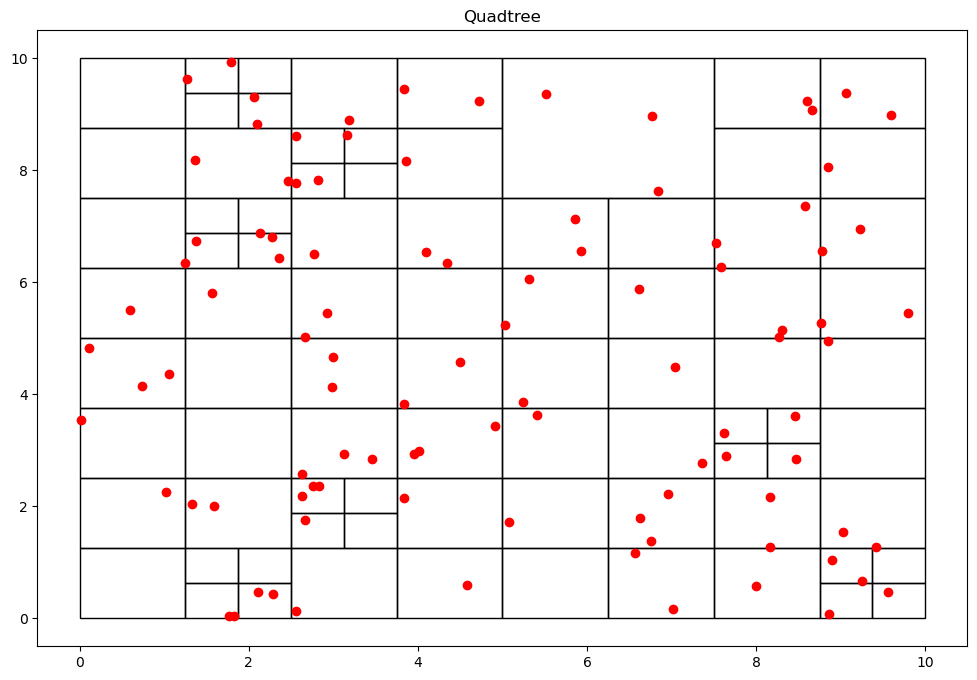

In [35]:
test.graph()